In [73]:
from rdkit import Chem

import sys
sys.path.append('../molecules')
from rdkit.Chem import MolToSmiles, MolFromSmiles

In [74]:
fragments = ['*CN', '*C1OC(*)C(O)C(O)C1N', '*O*', '*OC1C(*)C(N)CC(N)C1O', '*CC(O)C*', '*N1CC2CC1CN2*', '*CC(O)C*', '*O*', '*C1C(N)CC(N)C(O)C1*', '*O*', 'C1(*)OC(CN)C(O)C(O)C1N']

In [75]:
def replace_last(s, old, new):
    s_reversed = s[::-1]
    old_reversed = old[::-1]
    new_reversed = new[::-1]

    # Replace the first occurrence in the reversed string
    s_reversed = s_reversed.replace(old_reversed, new_reversed, 1)

    # Reverse the string back to original order
    return s_reversed[::-1]

In [76]:
def reconstruct(fragments):
    print("Reconstructing...")
    frag_recomb_list = []
    frag_2_re = fragments[-1]
    for i in range(len(fragments)-1):
        frag_1_re = fragments[-1*i-2]
        recomb = replace_last(frag_2_re, "*", frag_1_re.replace("*", "",1))
        recomb_canon = MolToSmiles(MolFromSmiles(Chem.CanonSmiles(recomb)),rootedAtAtom = 1)
        print("Base Molecule: ",frag_2_re)
        print("Fragment: ",frag_1_re)
        print("Recombined: ",recomb_canon)
        frag_recomb_list.append(recomb_canon)
        frag_2_re = recomb_canon
    print("Reconstructed Fragments: ",frag_recomb_list)
    molecules = [Chem.MolFromSmiles(smiles) for smiles in frag_recomb_list]
    img = Chem.Draw.MolsToGridImage(molecules, molsPerRow=5, subImgSize=(600, 600))
    return img

Reconstructing...
Base Molecule:  C1(*)OC(CN)C(O)C(O)C1N
Fragment:  *O*
Recombined:  O(*)C1OC(CN)C(O)C(O)C1N
Base Molecule:  O(*)C1OC(CN)C(O)C(O)C1N
Fragment:  *C1C(N)CC(N)C(O)C1*
Recombined:  C1(*)C(O)C(N)CC(N)C1OC1OC(CN)C(O)C(O)C1N
Base Molecule:  C1(*)C(O)C(N)CC(N)C1OC1OC(CN)C(O)C(O)C1N
Fragment:  *O*
Recombined:  O(*)C1C(O)C(N)CC(N)C1OC1OC(CN)C(O)C(O)C1N
Base Molecule:  O(*)C1C(O)C(N)CC(N)C1OC1OC(CN)C(O)C(O)C1N
Fragment:  *CC(O)C*
Recombined:  C(*)C(O)COC1C(O)C(N)CC(N)C1OC1OC(CN)C(O)C(O)C1N
Base Molecule:  C(*)C(O)COC1C(O)C(N)CC(N)C1OC1OC(CN)C(O)C(O)C1N
Fragment:  *N1CC2CC1CN2*
Recombined:  N1(*)CC2CC1CN2CC(O)COC1C(O)C(N)CC(N)C1OC1OC(CN)C(O)C(O)C1N
Base Molecule:  N1(*)CC2CC1CN2CC(O)COC1C(O)C(N)CC(N)C1OC1OC(CN)C(O)C(O)C1N
Fragment:  *CC(O)C*
Recombined:  C(*)C(O)CN1CC2CC1CN2CC(O)COC1C(O)C(N)CC(N)C1OC1OC(CN)C(O)C(O)C1N
Base Molecule:  C(*)C(O)CN1CC2CC1CN2CC(O)COC1C(O)C(N)CC(N)C1OC1OC(CN)C(O)C(O)C1N
Fragment:  *OC1C(*)C(N)CC(N)C1O
Recombined:  C1(*)C(N)CC(N)C(O)C1OCC(O)CN1CC2CC1CN2CC

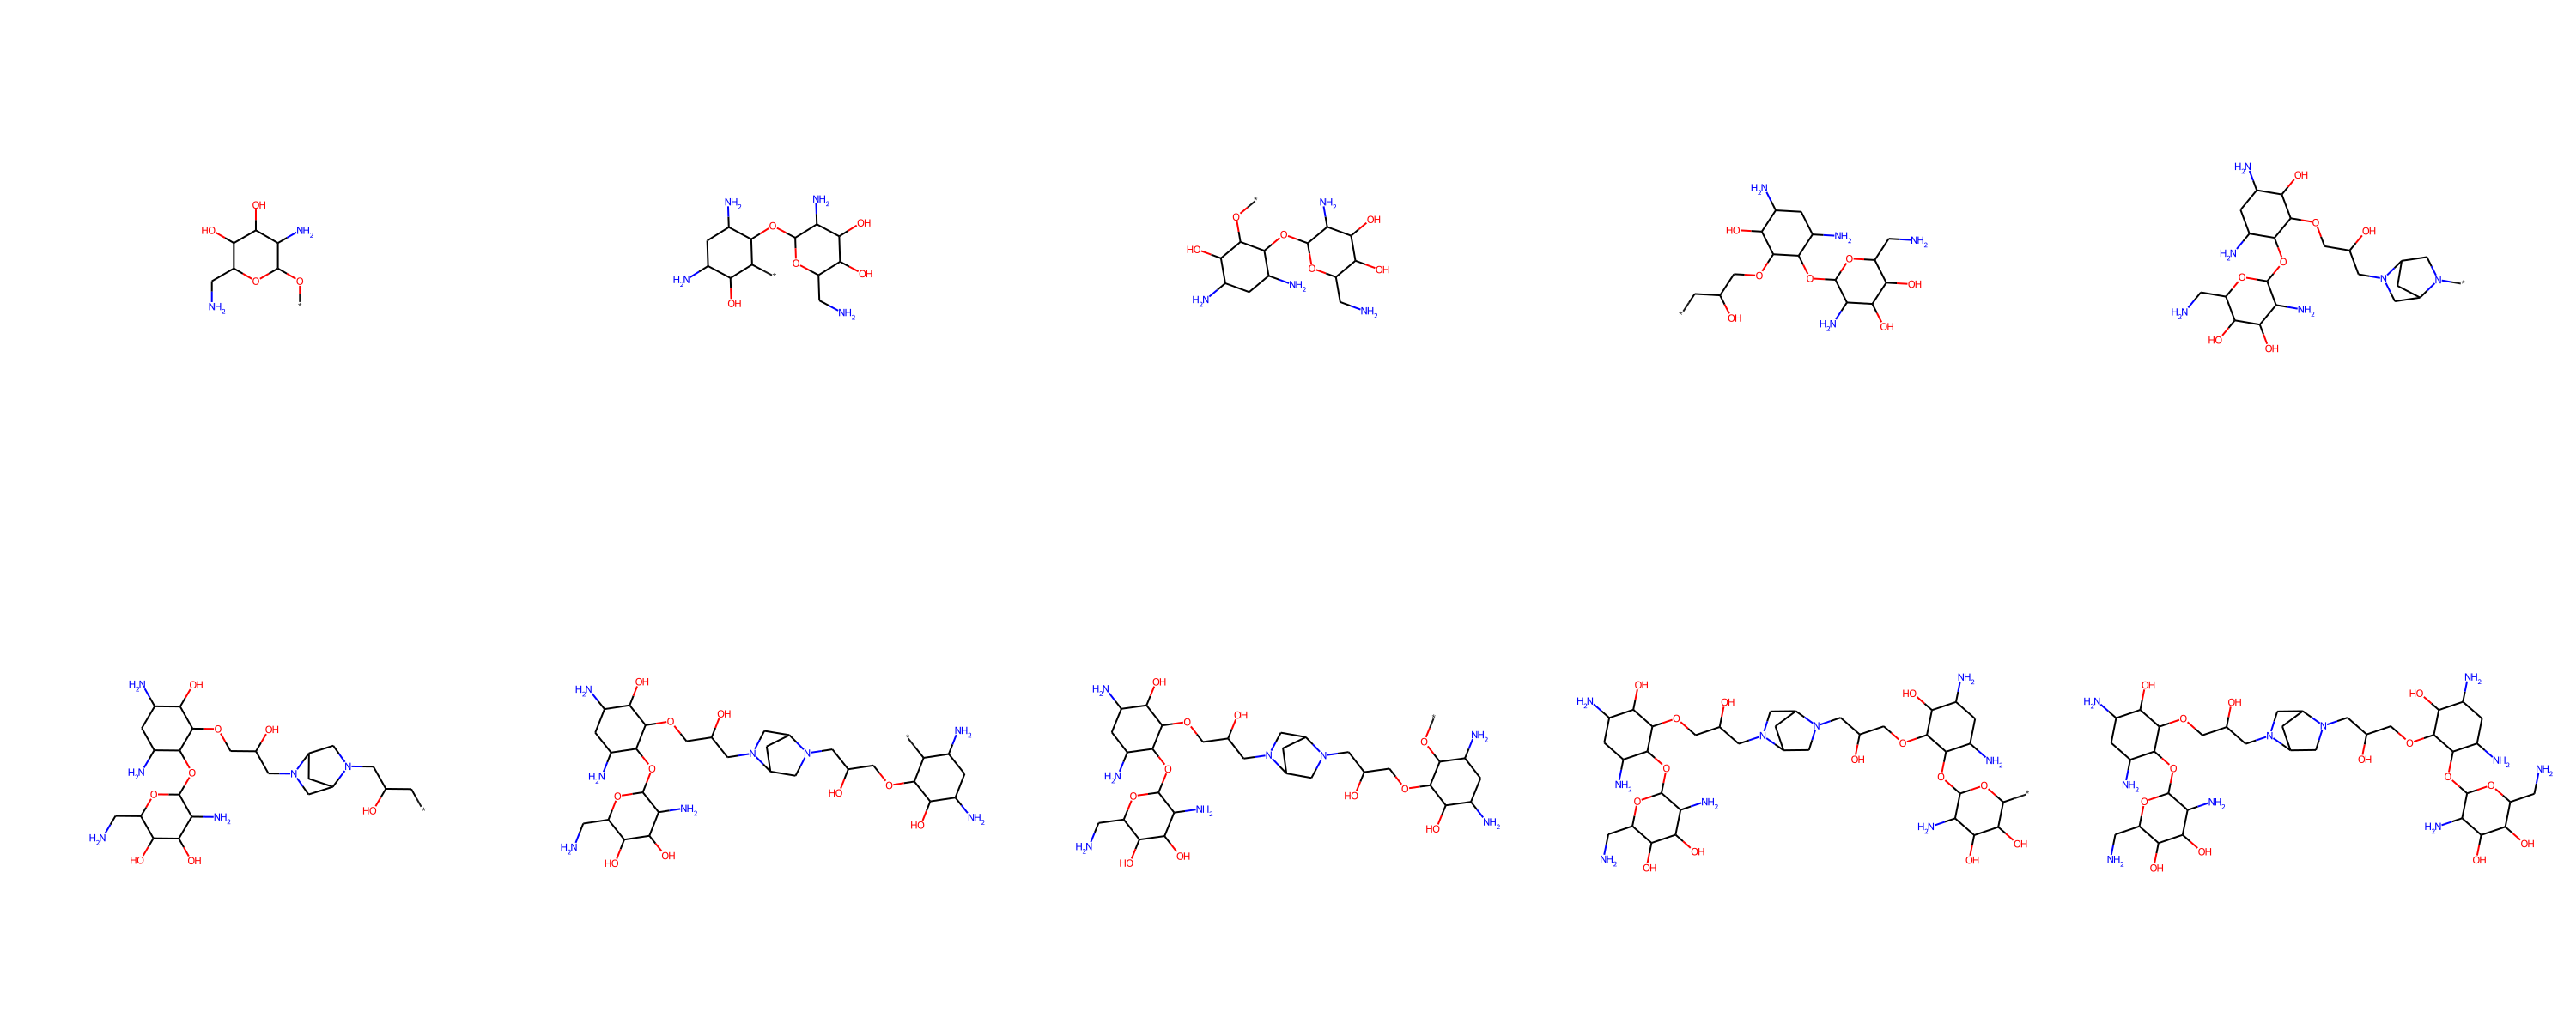

In [77]:
img = reconstruct(fragments)
img

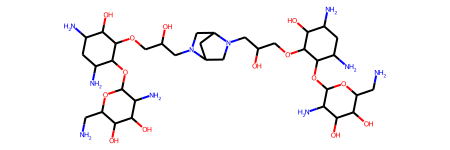

In [80]:
MolFromSmiles("NCC1OC(OC2C(N)CC(N)C(O)C2OCC(O)CN2CC3CC2CN3CC(O)COC2C(O)C(N)CC(N)C2OC2OC(CN)C(O)C(O)C2N)C(N)C(O)C1O")